In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create data frame
mycolumns = [
    'data','platform','lang',
    'pixeldata.read','pixeldata.read.init','pixeldata.read.pixels',
    'pixeldata.write','pixeldata.write.init','pixeldata.write.pixels','pixeldata.write.close']
d = pd.DataFrame(columns=mycolumns)

# Read all CSV files into a data frame
for data in ['bbbc', 'mitocheck']:
    for platform in ['win', 'linux']:
        for lang in ['cpp', 'java']:
            if lang == 'java':
                name_col = 'test.lang'
            else:
                name_col = 'test.name'
   
            # Read initial csv table
            file_name = 'results/' + data + '-pixeldata-' + platform + '-' + lang + '.tsv'
            table = pd.read_table(file_name,dtype={name_col: str})
            
            # Store each run as a row
            if lang == 'java':
                m = table.groupby(['test.name']).mean()
                m = m['real']
            else:
                m = table.groupby(['test.lang']).mean()
                m = m['test.file']
            m['data'] =  data
            m['platform'] = platform
            m['lang'] = lang
            d.loc[len(d)] = m
            
d

,data,platform,lang,pixeldata.read,pixeldata.read.init,pixeldata.read.pixels,pixeldata.write,pixeldata.write.init,pixeldata.write.pixels,pixeldata.write.close
0,bbbc,win,cpp,812327.666667,477664.666667,334663.000000,1.782637e+06,2073.666667,1.779104e+06,1459.000000
1,bbbc,win,java,157221.666667,2741.666667,154479.666667,4.575163e+05,7.000000,4.528420e+05,4667.000000
2,bbbc,linux,cpp,179966.666667,113350.000000,66616.666667,1.985867e+05,2013.333333,1.953200e+05,1253.333333
3,bbbc,linux,java,99591.333333,1584.666667,98006.000000,1.386397e+05,7.000000,1.353783e+05,3253.333333
4,mitocheck,win,cpp,73710.000000,72665.666667,1044.333333,1.206380e+05,1774.000000,1.162920e+05,2572.000000
5,mitocheck,win,java,2569.000000,865.333333,1703.000000,1.220833e+04,1.333333,1.079267e+04,1414.000000
6,mitocheck,linux,cpp,66153.333333,65476.666667,676.666667,1.234000e+04,1623.333333,8.923333e+03,1793.333333
7,mitocheck,linux,java,1550.666667,589.333333,960.666667,5.203667e+03,1.333333,4.110000e+03,1091.666667


In [3]:
# d.columns = [c.replace('.', '_') for c in d.columns]
# d.groupby(['data', 'platform']).pixeldata_read.size().unstack().plot(kind='bar', stacked=True)


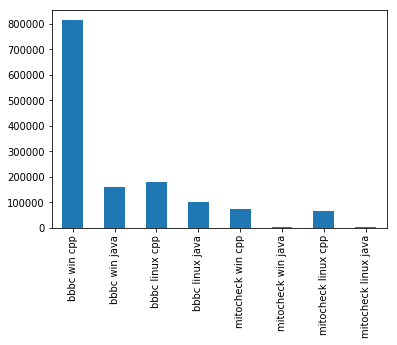

In [4]:
f= plt.figure()
ax = d['pixeldata.read'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

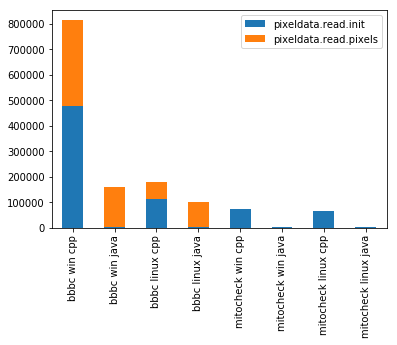

In [5]:
plt.figure()
cols = ['pixeldata.read.init', 'pixeldata.read.pixels']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

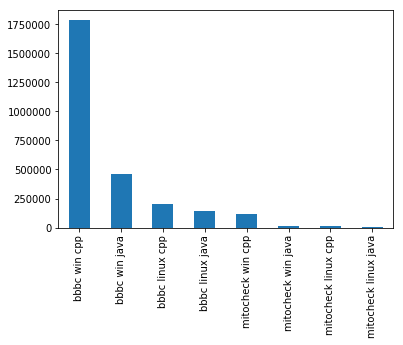

In [6]:
plt.figure()
ax = d['pixeldata.write'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

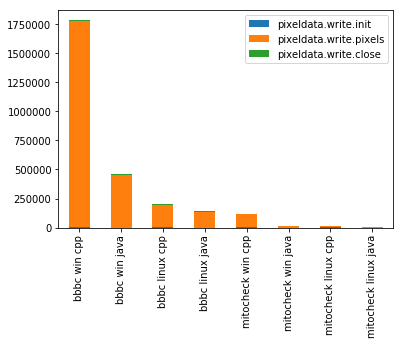

In [7]:
plt.figure()
cols = ['pixeldata.write.init', 'pixeldata.write.pixels', 'pixeldata.write.close']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()